In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import sklearn as sk
from sklearn.cluster import KMeans,DBSCAN
from sklearn_som.som import SOM
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D



In [2]:
A=pd.read_csv('LA5c_selected_dwi.csv')

In [3]:
A.head()

,ID,Diagnosis,Age,Sex,gender,school_yrs,cigs,cpt_fa,BMI,ht,...,NAc_MD_R,NAc_MD_bilat_avg,NAc-vmPFC_waytotal_L,NAc-vmPFC_waytotal_R,NAc-vmPFC_norm_waytotal_L,NAc-vmPFC_norm_waytotal_R,NAc-vmPFC_norm_waytotal_bilat_avg,NAc-vmPFC_CI_L,NAc-vmPFC_CI_R,NAc-vmPFC_CI_bilat_avg
0,sub-10159,CONTROL,30,F,2,16,0,5,20.358655,67.0,...,0.000838,0.000896,75498,64258,0.314575,0.251992,0.283284,0.906644,0.889280,0.897962
1,sub-10171,CONTROL,24,M,1,16,0,11,23.731674,72.0,...,0.000820,0.000816,72316,79742,0.289264,0.274972,0.282118,0.900202,0.897351,0.898776
2,sub-10189,CONTROL,49,M,1,16,2,25,NaN,NaN,...,0.000770,0.000785,72257,46912,0.321142,0.223390,0.272266,0.907832,0.877695,0.892763
3,sub-10193,CONTROL,40,M,1,12,2,7,NaN,NaN,...,0.000420,0.000594,46124,42353,0.159048,0.132353,0.145701,0.853824,0.840465,0.847144
4,sub-10206,CONTROL,21,M,1,13,0,14,22.804931,68.0,...,0.000783,0.000766,41477,69740,0.212703,0.317000,0.264851,0.872926,0.906608,0.889767


In [4]:
A.keys()

Index(['ID', 'Diagnosis', 'Age', 'Sex', 'gender', 'school_yrs', 'cigs',
       'cpt_fa', 'BMI', 'ht', 'wt', 'ht_ft', 'ht_in', 'HAMD-17', 'HAMD-21',
       'HAMD-28', 'bis_1sc', 'bis_1cogcom', 'bis_1atten', 'bis_1coginst',
       'bis_1mot', 'bis_1pers', 'ScannerSerialNumber', 'NAc_FA_L', 'NAc_FA_R',
       'NAc_FA_bilat_avg', 'NAc_MD_L', 'NAc_MD_R', 'NAc_MD_bilat_avg',
       'NAc-vmPFC_waytotal_L', 'NAc-vmPFC_waytotal_R',
       'NAc-vmPFC_norm_waytotal_L', 'NAc-vmPFC_norm_waytotal_R',
       'NAc-vmPFC_norm_waytotal_bilat_avg', 'NAc-vmPFC_CI_L', 'NAc-vmPFC_CI_R',
       'NAc-vmPFC_CI_bilat_avg'],
      dtype='object')

In [6]:
C=A[['bis_1sc', 'BMI','NAc-vmPFC_norm_waytotal_R','cigs']].dropna()

C2=np.array(C)

In [7]:
kmeans=KMeans(n_clusters=3).fit(C)

In [8]:
kmeans

y_kmeans = kmeans.predict(C)

In [9]:
centers = kmeans.cluster_centers_
print(centers)



[[16.85106383 24.64762014  0.2845353   0.68085106]
 [12.77777778 35.27581068  0.26264289  0.68888889]
 [10.9122807  23.84035449  0.29704377  0.46491228]]


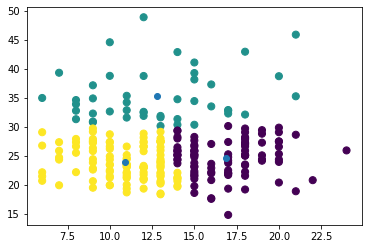

In [10]:
plt.scatter(C2[:, 0], C2[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:,0],centers[:,1])

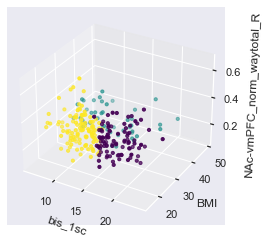

In [11]:
sns.set(style = "darkgrid")
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

plotvector=[0,1,2]

x = C[C.keys()[plotvector[0]]]
y = C[C.keys()[plotvector[1]]]
z = C[C.keys()[plotvector[2]]]

#x = C['bis_1sc']
#y = C['BMI']
#z = C['NAc-vmPFC_norm_waytotal_R']
ax.set_xlabel(C.keys()[0])
ax.set_ylabel(C.keys()[1])
ax.set_zlabel(C.keys()[2])

ax.scatter(x, y, z,c=y_kmeans, s=10, cmap='viridis')
plt.show()

## Extraction of part of the population 

Text(0, 0.5, 'BMI')

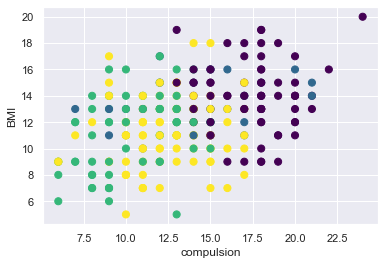

In [12]:
D = A[['bis_1sc','bis_1cogcom', 'BMI']].dropna()

D2=np.array(D)
kmeans=KMeans(n_clusters=4,max_iter=300,n_init=20).fit(D)
y_kmeans = kmeans.predict(D)
plt.scatter(D2[:, 0], D2[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('compulsion')
plt.ylabel('BMI')


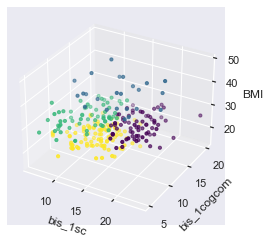

In [13]:
sns.set(style = "darkgrid")
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

plotvector=[0,1,2]

x = D[D.keys()[plotvector[0]]]
y = D[D.keys()[plotvector[1]]]
z = D[D.keys()[plotvector[2]]]

#x = C['bis_1sc']
#y = C['BMI']
#z = C['NAc-vmPFC_norm_waytotal_R']
ax.set_xlabel(D.keys()[0])
ax.set_ylabel(D.keys()[1])
ax.set_zlabel(D.keys()[2])

ax.scatter(x, y, z,c=y_kmeans, s=10, cmap='viridis')
plt.show()

In [14]:
data=C[y_kmeans==3] # selection of one part of the population for ML
data.head()

,bis_1sc,BMI,NAc-vmPFC_norm_waytotal_R,cigs
0,13,20.358655,0.251992,0
4,9,22.804931,0.317000,0
7,14,22.044766,0.289841,1
9,11,23.053627,0.233387,0
12,13,20.595703,0.310321,0


In [15]:
Y = data['NAc-vmPFC_norm_waytotal_R']
X = data[['bis_1sc','BMI','cigs']]

## Machine learning to predict the number of streamlines in one of the brain Nac circuits.

In [16]:
import tensorflow as tf

import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import SGD
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


In [17]:
np.random.seed(897431013)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p,:], b[p,:]

In [28]:
X=sk.preprocessing.normalize(X)

X_train,X_test,Y_train,Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2)

In [29]:
# define model 

model = Sequential()
model.add(Dense(30,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10,kernel_regularizer='l2'))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                120       
_________________________________________________________________
activation_7 (Activation)    (None, 30)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 55        
_________________________________________________________________
activation_9 (Activation)    (None, 5)                

In [30]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1E-8, decay=0.0, amsgrad=False)
model.compile(loss='mse',
              optimizer=adam)
filepath_checkpoint = 'best_model_MLP'
model_checkpoint = ModelCheckpoint(filepath_checkpoint, monitor='val_loss', save_best_only=True) 
model_callbacks = [model_checkpoint]

In [31]:

nb_epochs = 200
validation_split = 0.1
history = model.fit(X_train, Y_train, batch_size=150, epochs=nb_epochs, validation_split=validation_split, shuffle=True, verbose = 2, callbacks=model_callbacks)
#history = model.fit(X_train, Y_train, batch_size=2048, epochs=nb_epochs, validation_data=(X_val,Y_val), shuffle=True, verbose = 0, callbacks=model_callbacks)

Epoch 1/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.5085 - val_loss: 0.5644
Epoch 2/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.4508 - val_loss: 0.5364
Epoch 3/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.4236 - val_loss: 0.5095
Epoch 4/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.4130 - val_loss: 0.4836
Epoch 5/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.3652 - val_loss: 0.4590
Epoch 6/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.3811 - val_loss: 0.4352
Epoch 7/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.3770 - val_loss: 0.4125
Epoch 8/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.3262 - val_loss: 0.3909
Epoch 9/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.3230 - val_loss:

1/1 - 1s - loss: 0.1247 - val_loss: 0.1417
Epoch 74/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1218 - val_loss: 0.1399
Epoch 75/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1200 - val_loss: 0.1382
Epoch 76/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1187 - val_loss: 0.1366
Epoch 77/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1175 - val_loss: 0.1350
Epoch 78/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1154 - val_loss: 0.1334
Epoch 79/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1185 - val_loss: 0.1319
Epoch 80/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1156 - val_loss: 0.1305
Epoch 81/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.1147 - val_loss: 0.1291
Epoch 82/200
INFO:tensorflow:Assets written to: best_

Epoch 146/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0818 - val_loss: 0.0908
Epoch 147/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0809 - val_loss: 0.0904
Epoch 148/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0809 - val_loss: 0.0900
Epoch 149/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0788 - val_loss: 0.0896
Epoch 150/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0795 - val_loss: 0.0892
Epoch 151/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0806 - val_loss: 0.0888
Epoch 152/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0780 - val_loss: 0.0884
Epoch 153/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 0.0780 - val_loss: 0.0880
Epoch 154/200
INFO:tensorflow:Assets written to: best_model_MLP\assets
1/1 - 1s - loss: 

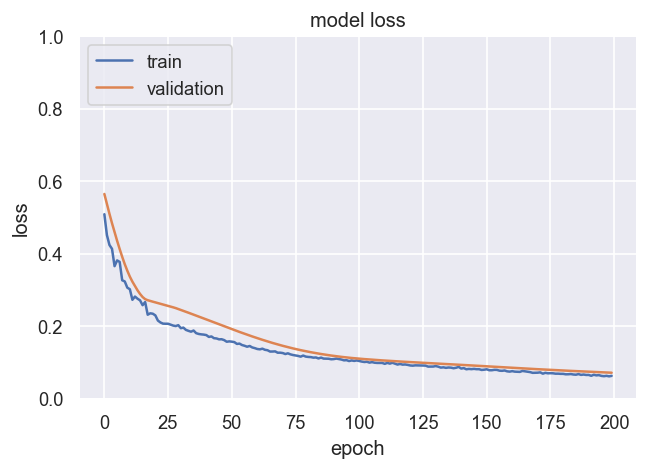

In [32]:
plt.figure(dpi=120)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
Y_predict = model.predict(X_test)

In [34]:
model.evaluate(X_test, Y_test, verbose=2)

1/1 - 0s - loss: 0.0682


0.06816139817237854